To enable interactive plots, run `jupyter labextension install jupyter-matplotlib` followed by:

In [1]:
!pip install --upgrade ipympl matplotlib -q
%matplotlib ipympl

In [2]:
!pip install hdbscan pymatgen colorcet -q

In [35]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from ipywidgets import interact, Output
from IPython.display import clear_output

import sys
sys.path.append('..')
sys.path.append('../autoencoder')
# sys.path.append('/notebooks/Beta-VAE/')
from models import*

from src.band_plotters import*
from src.TensorImageNoised import *
from src.cluster_plotters import *
sys.path.append('/notebooks/band-fingerprint/autoencoder/resnet_autoencoder')
sys.path.append('/notebooks/band-fingerprint/src')

from model import *

from ae_misc import *

In [68]:
FINGERPRINT_LENGTH = 98
FINGERPRINT_NAME = "materials_project/df_resnet50.csv"
FINGERPRINT_COLS = [str(i) for i in range(FINGERPRINT_LENGTH)]
BORING_COLS = FINGERPRINT_COLS + ["fx", "fy"]

## Load Data

In [69]:
df = pd.read_csv(f"../fingerprints/{FINGERPRINT_NAME}", index_col="material_id")
df.head()

# View cluster for any fingerprint

<Figure size 576x576 with 0 Axes>

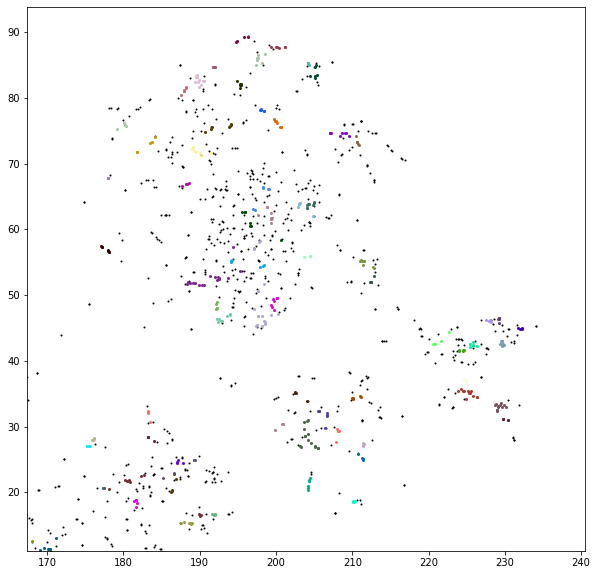

interactive(children=(IntSlider(value=439, description='label', max=879, min=-1), Output()), _dom_classes=('wi…

<function __main__.view_cluster(label)>

In [51]:
%matplotlib inline
def view_cluster(label):
    display(df[df.labels==label].drop(BORING_COLUMNS, axis=1).head(100))
    num_plots = len(df[df.labels==label])
    print(num_plots)

interact(view_cluster, label=(-1, len(np.unique(df.labels))-2, 1))

In [39]:
class Binarize(Transform):
    def __init__(self, threshold=0.8):self.threshold=threshold
    def encodes(self, o): 
        # print(o)
        mask = (o > (255 * self.threshold))
        return mask * 255

In [40]:
def bce_loss(pred, targ):
    x_recon, mu, logvar = pred
    
    return nn.BCEWithLogitsLoss()(x_recon, targ) + 0.05 * kld_mean_loss(mu, logvar)

## Plots

Output()

Colors used multiple times since number of categories exceeds 256.


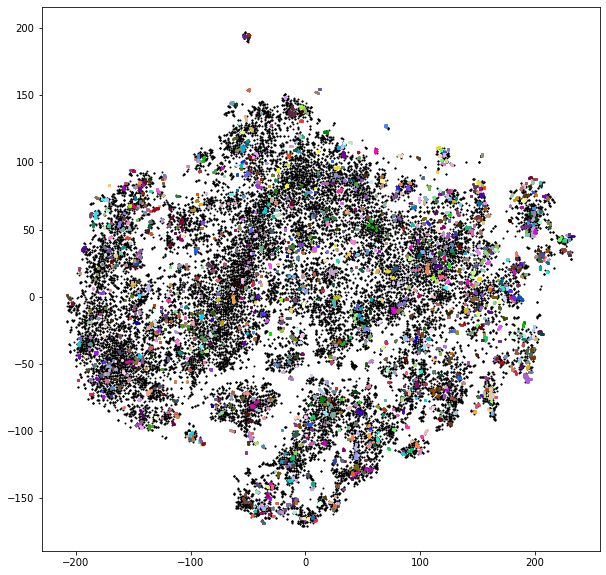

In [56]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(10, 10))
ax = plot_groups(df,"labels", ax=ax)
#ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [ ]:
import 